In [8]:
import numpy as np
import pystan

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

### Exact

In [1]:
k = 21
r = 5

In [2]:
k / (k+r)

0.8076923076923077

In [3]:
(k-1/3) / (k+r-2/3)

0.8157894736842106

In [4]:
(k-1) / (k+r-2)

0.8333333333333334

In [7]:
np.sqrt((k*r) / (k+r)**2 / (k+r+1))

0.07584717670640533

### MCMC

In [11]:
model_code = """
data {
    int<lower=1> r;
    int<lower=0> k;
}
parameters {
    real<lower=0, upper=1> p;
}
model {
    target += (k-1) * log(p) + (r-1) * log(1 - p);
}
"""
model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4b7930c72231c4f83894d8c96dc6489b NOW.


In [13]:
data = {'k': 21, 'r':5}

In [14]:
fit = model.sampling(data=data, seed=123456)

In [15]:
p_samples = fit.extract()['p']

In [20]:
np.mean(p_samples)

0.8075889318607008

In [21]:
np.std(p_samples)

0.07576695154030876

In [22]:
np.median(p_samples)

0.8152463120244616

### MAP + Laplace

In [23]:
p_map = (k-1) / (k+r -2)

In [24]:
d2logP = - (k-1) / p_map**2 - (r-1) / (1-p_map)**2

In [25]:
std_L = np.sqrt(-1 / d2logP)

In [26]:
p_map

0.8333333333333334

In [27]:
std_L

0.07607257743127306

### Comparison

In [33]:
from scipy.stats import beta
from scipy.stats import norm

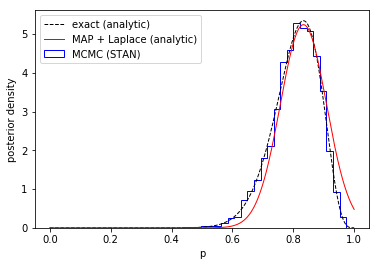

In [40]:
plt.figure(figsize=(6,4))
x = np.linspace(0,1, 1000)
plt.plot(x, beta.pdf(x, a=k, b=r), 'k--', lw=1, label='exact (analytic)')
plt.plot(x, norm.pdf(x, loc=p_map, scale=std_L), 'r-', lw=1, label='MAP + Laplace (analytic)')
plt.hist(p_samples, bins=25, density=True, label='MCMC (STAN)', 
         histtype='step', color='b')


plt.xlabel('p')
plt.ylabel('posterior density')
# plt.xlim([0,250])
plt.legend()

plt.savefig('./P2_p_posterior.pdf', bbox_inches='tight')
plt.show()

In [30]:
beta?